#importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#Data Collection and Preprocessing

In [ ]:
#loading the data from a csv file to a pandas Dataframe
calorie_df=pd.read_csv("/content/calories.csv")

In [ ]:
#print the first 5 rows of the dataframe
calorie_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
#Exercise Data
exercise_df=pd.read_csv("/content/exercise.csv")

In [ ]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


#Combining the two Dataframes

In [ ]:
#join the two dataframes
df=pd.merge(exercise_df,calorie_df)

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the rows and columns
df.shape

(15000, 9)

In [ ]:
 #checking the data for missing value and info
 df.info()
 df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


#Data Analysis

In [ ]:
#get some statistical measures about the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

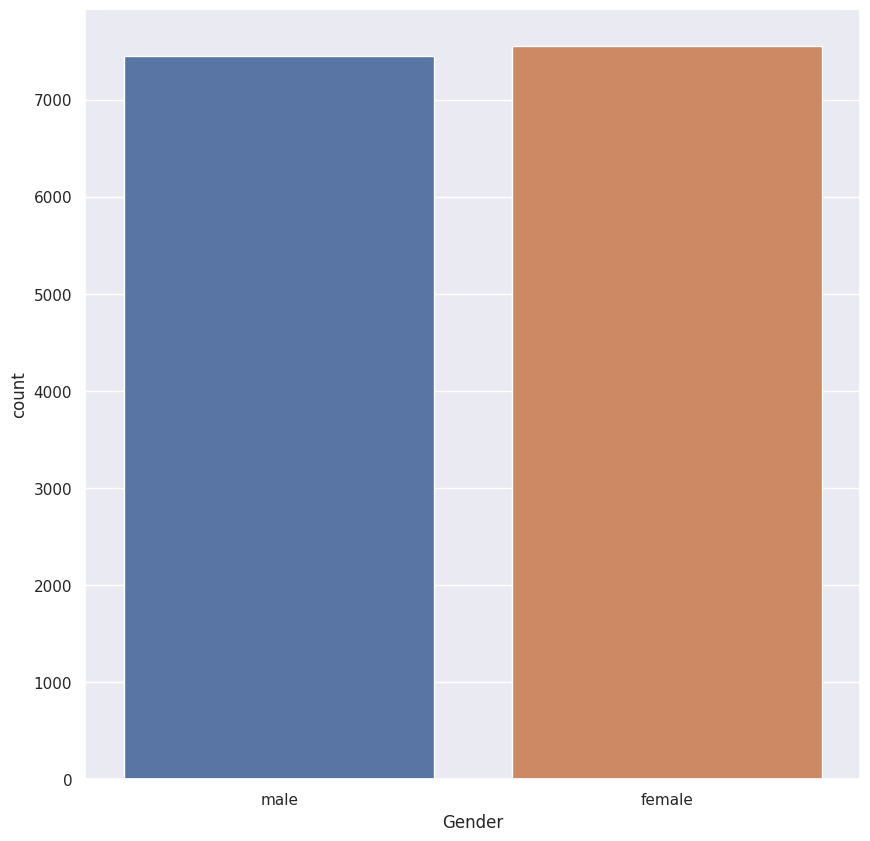

In [ ]:
#finding the count of gender
plt.figure(figsize=(10,10))
sns.countplot(x='Gender',data=df,hue="Gender")


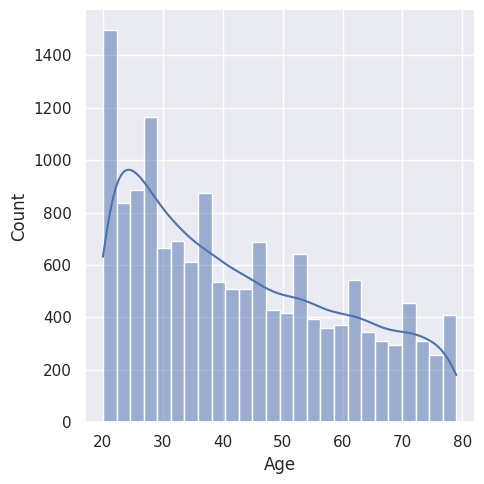

In [ ]:
#find the distribution of age
sns.displot(df['Age'],kde=True)

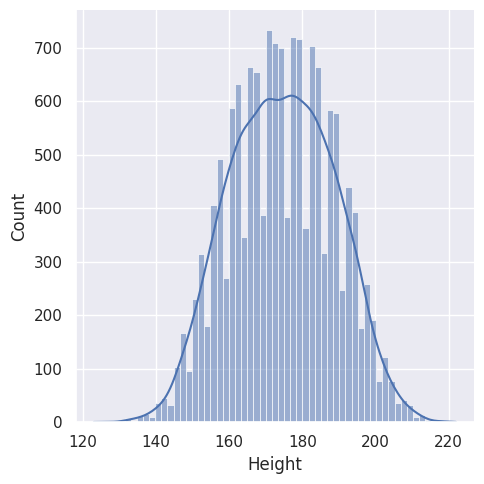

In [ ]:
#find the distribution of height
sns.displot(df['Height'],kde=True)

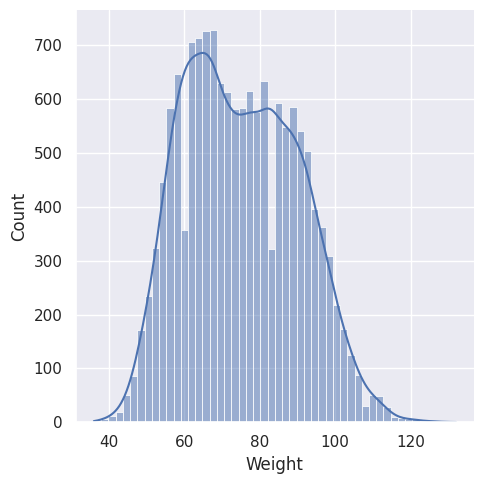

In [ ]:
#find the distribution of weight
sns.displot(df['Weight'],kde=True)

Finding the correlation

Encoding the Gender

male :1
female :0

In [ ]:
df.replace({"Gender":{'male':1,'female':0}},inplace=True)

<ipython-input-16-982054f1667a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{'male':1,'female':0}},inplace=True)


In [ ]:
correlation=df.corr(numeric_only=False)

<Axes: >

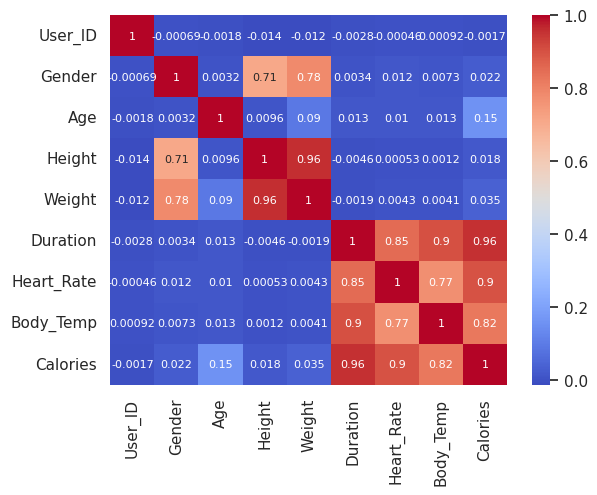

In [ ]:
sns.heatmap(correlation,cbar=True,annot=True,annot_kws={'size':8},cmap="coolwarm")

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating the features and Target

In [ ]:
X=df.drop(columns=['User_ID',"Calories"],axis=1)
Y=df["Calories"]

In [ ]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

Splitting the train and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [ ]:
#loading the model
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

PRediction on train Data

In [ ]:
train_prediction=model.predict(X_train)
# R2 metric
r2_train=metrics.r2_score(Y_train,train_prediction)
print("R2 score of the training data:",r2_train)

R2 score of the training data: 0.9995691477017405


Prediction on test Data

In [ ]:
test_prediction=model.predict(X_test)
print(test_prediction)
# R2 metric
r2_test=metrics.r2_score(Y_test,test_prediction)
print("R2 score of the training data:",r2_test)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]
R2 score of the training data: 0.998800624504713


Mean Absolute Error

In [ ]:
mae=metrics.mean_absolute_error(Y_test,test_prediction)
print("Mean Absolute Error:",mae)
#

Mean Absolute Error: 1.4833678883314132


Building a prediction model

In [ ]:
input=(0	,27	,154.0,	58.0	,10.0	,81.0,	39.8	)
input_asnumpy=np.asarray(input)
input_reshaped=input_asnumpy.reshape(1,-1)
prediction=model.predict(input_reshaped)
print(prediction)

[35.35871]
